<a href="https://colab.research.google.com/github/lakshit13/Video-Game-Sales-Prediction/blob/main/task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [8]:
sales = pd.read_csv('/content/Video_Games_Sales_as_at_22_Dec_2016.csv')
sales.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
print(sales.isnull().sum())

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64


In [10]:
sales.drop(columns = ['Year_of_Release', 'Developer', 'Publisher', 'Platform'], inplace = True)
print('Feature name || Total missing values')

Feature name || Total missing values


In [11]:
print(sales.isnull().sum())

Name               2
Genre              2
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Critic_Score    8582
Critic_Count    8582
User_Score      6704
User_Count      9129
Rating          6769
dtype: int64


In [12]:
sales.head()

,Name,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Sports,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,E
1,Super Mario Bros.,Platform,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Racing,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,E
3,Wii Sports Resort,Sports,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,E
4,Pokemon Red/Pokemon Blue,Role-Playing,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN


In [13]:
print(sales['User_Score'].dtype)

object


In [14]:
for i in range(len(sales['User_Score'])):
    if type(sales['User_Score'].iloc[i]) == type("String") and sales['User_Score'].iloc[i] != 'tbd':
        sales.loc[i, 'User_Score'] = float(sales['User_Score'].iloc[i])
    if sales['User_Score'].iloc[i] == 'tbd':
        sales.loc[i, 'User_Score'] = 0.0

In [15]:
imputer = SimpleImputer(strategy = 'mean')
sales.iloc[:,[7,8,9,10]] = imputer.fit_transform(sales.iloc[:,[7,8,9,10]])
sales.head()

<ipython-input-15-59dc0e18e0eb>:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  sales.iloc[:,[7,8,9,10]] = imputer.fit_transform(sales.iloc[:,[7,8,9,10]])


,Name,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Sports,41.36,28.96,3.77,8.45,82.53,76.000000,51.000000,8.00000,322.000000,E
1,Super Mario Bros.,Platform,29.08,3.58,6.81,0.77,40.24,68.967679,26.360821,5.39981,162.229908,NaN
2,Mario Kart Wii,Racing,15.68,12.76,3.79,3.29,35.52,82.000000,73.000000,8.30000,709.000000,E
3,Wii Sports Resort,Sports,15.61,10.93,3.28,2.95,32.77,80.000000,73.000000,8.00000,192.000000,E
4,Pokemon Red/Pokemon Blue,Role-Playing,11.27,8.89,10.22,1.00,31.37,68.967679,26.360821,5.39981,162.229908,NaN


In [16]:
imputer = SimpleImputer(strategy = 'constant', fill_value = 'NA')
sales.iloc[:, [0,1,11]] = imputer.fit_transform(sales.iloc[:, [0,1,11]])

In [17]:
sales.head()

,Name,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Sports,41.36,28.96,3.77,8.45,82.53,76.000000,51.000000,8.00000,322.000000,E
1,Super Mario Bros.,Platform,29.08,3.58,6.81,0.77,40.24,68.967679,26.360821,5.39981,162.229908,NA
2,Mario Kart Wii,Racing,15.68,12.76,3.79,3.29,35.52,82.000000,73.000000,8.30000,709.000000,E
3,Wii Sports Resort,Sports,15.61,10.93,3.28,2.95,32.77,80.000000,73.000000,8.00000,192.000000,E
4,Pokemon Red/Pokemon Blue,Role-Playing,11.27,8.89,10.22,1.00,31.37,68.967679,26.360821,5.39981,162.229908,NA


In [18]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16719 non-null  object 
 1   Genre         16719 non-null  object 
 2   NA_Sales      16719 non-null  float64
 3   EU_Sales      16719 non-null  float64
 4   JP_Sales      16719 non-null  float64
 5   Other_Sales   16719 non-null  float64
 6   Global_Sales  16719 non-null  float64
 7   Critic_Score  16719 non-null  float64
 8   Critic_Count  16719 non-null  float64
 9   User_Score    16719 non-null  float64
 10  User_Count    16719 non-null  float64
 11  Rating        16719 non-null  object 
dtypes: float64(9), object(3)
memory usage: 1.5+ MB


In [19]:
sales['Genre'].value_counts()

Action          3370
Sports          2348
Misc            1750
Role-Playing    1500
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       874
Fighting         849
Strategy         683
Puzzle           580
NA                 2
Name: Genre, dtype: int64

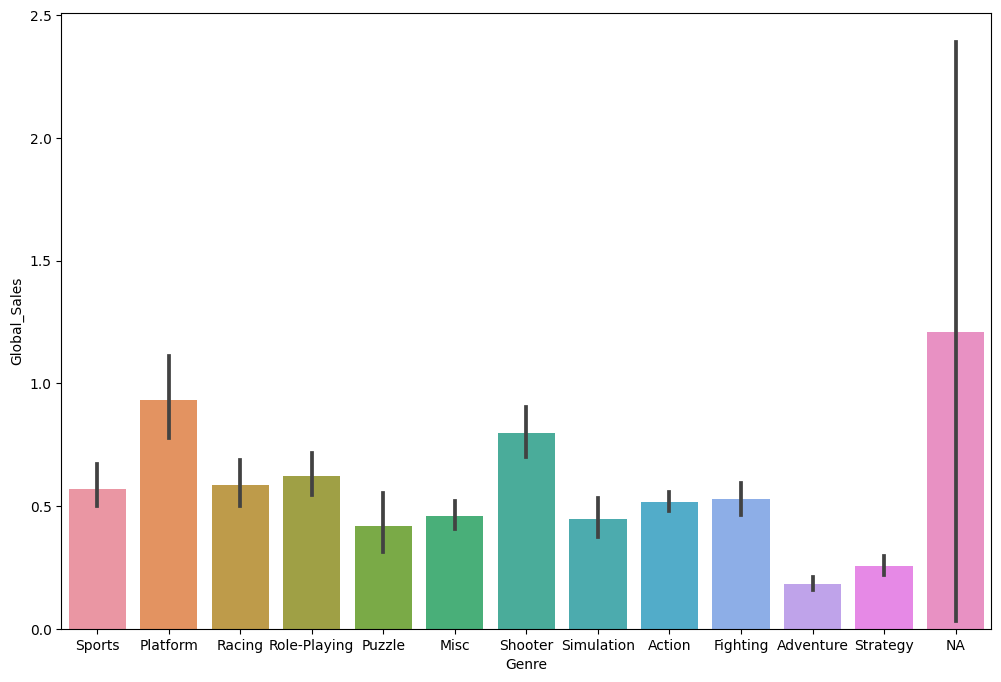

In [20]:
plt.figure(figsize = (12, 8))
sns.barplot(x = sales['Genre'], y = sales['Global_Sales'])
plt.show()

In [21]:
sales.groupby('Genre')['Global_Sales'].mean()

Genre
Action          0.517884
Adventure       0.182417
Fighting        0.527067
Misc            0.458960
NA              1.210000
Platform        0.932523
Puzzle          0.419000
Racing          0.583587
Role-Playing    0.622933
Shooter         0.795873
Simulation      0.446705
Sports          0.567291
Strategy        0.255490
Name: Global_Sales, dtype: float64

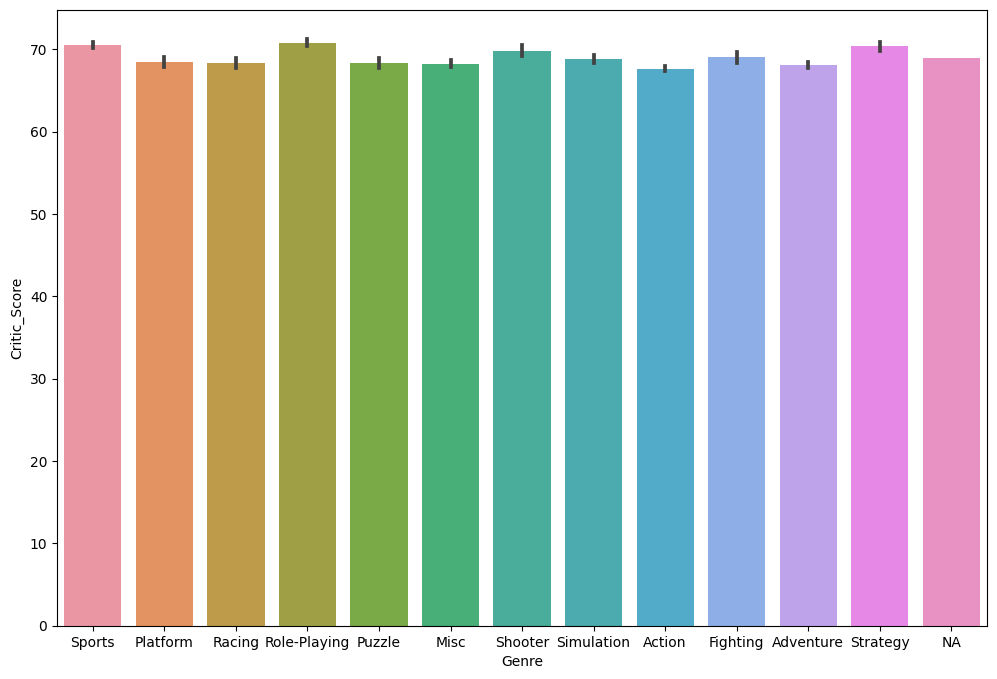

In [22]:
plt.figure(figsize = (12,8))
sns.barplot(x = sales['Genre'], y = sales['Critic_Score'])
plt.show()

In [23]:
sales.groupby('Genre')['Critic_Score'].mean()

Genre
Action          67.656132
Adventure       68.066251
Fighting        69.088078
Misc            68.265909
NA              68.967679
Platform        68.458741
Puzzle          68.371541
Racing          68.371187
Role-Playing    70.778226
Shooter         69.833522
Simulation      68.827378
Sports          70.493484
Strategy        70.346538
Name: Critic_Score, dtype: float64

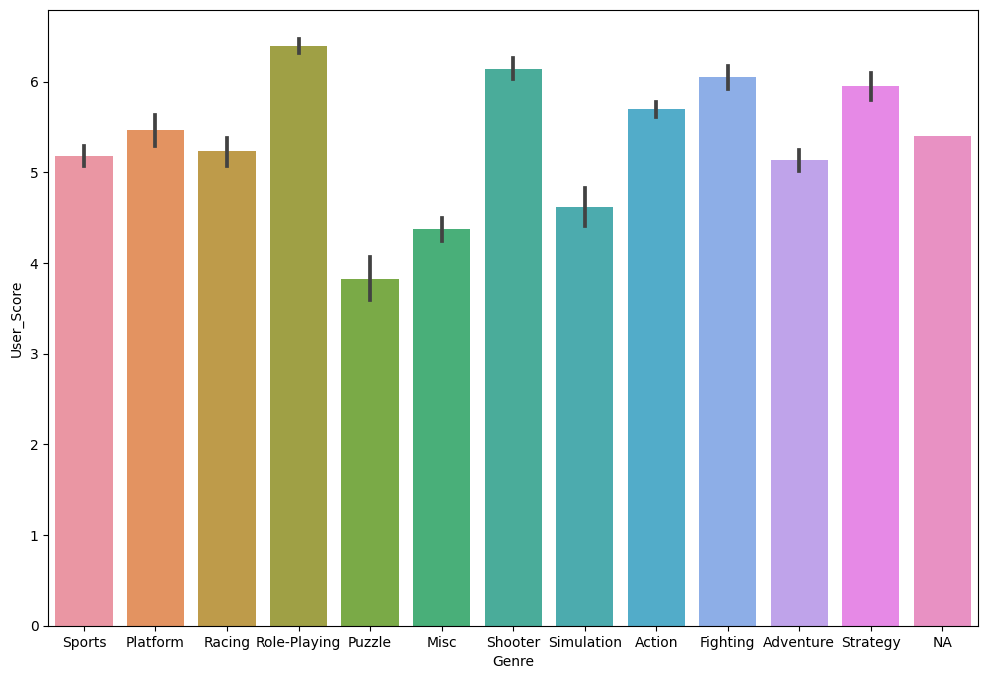

In [24]:
plt.figure(figsize = (12,8))
sns.barplot(x = sales['Genre'], y = sales['User_Score'])
plt.show()

In [25]:
sales.groupby('Genre')['User_Score'].mean()

Genre
Action          5.695632
Adventure       5.139939
Fighting        6.045962
Misc            4.370478
NA              5.399810
Platform        5.471103
Puzzle          3.827163
Racing          5.232289
Role-Playing    6.391308
Shooter         6.142587
Simulation      4.612179
Sports          5.183493
Strategy        5.954520
Name: User_Score, dtype: float64

In [26]:
rsales = sales.iloc[:, 2:11]
rsales.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
0,41.36,28.96,3.77,8.45,82.53,76.000000,51.000000,8.00000,322.000000
1,29.08,3.58,6.81,0.77,40.24,68.967679,26.360821,5.39981,162.229908
2,15.68,12.76,3.79,3.29,35.52,82.000000,73.000000,8.30000,709.000000
3,15.61,10.93,3.28,2.95,32.77,80.000000,73.000000,8.00000,192.000000
4,11.27,8.89,10.22,1.00,31.37,68.967679,26.360821,5.39981,162.229908


In [27]:
sales.replace({'Genre':{'Sports' : 0, 'Platform' : 1, 'Racing' : 2, 'Role-Playing' : 3, 'Puzzle' : 4, 'Misc' : 5, 'Shooter' : 6, 'Simulation' : 7, 'Action' : 8, 'Fighting' : 9, 'Adventure' : 10, 'Strategy' : 11, 'NA' : 12}}, inplace = True)

In [28]:
X = sales.iloc[:, [0, 1, 2, 3, 4, 5, 7, 8, 9, 10]]
y = sales['Global_Sales']
X.head()

,Name,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Critic_Score,Critic_Count,User_Score,User_Count
0,Wii Sports,0,41.36,28.96,3.77,8.45,76.000000,51.000000,8.00000,322.000000
1,Super Mario Bros.,1,29.08,3.58,6.81,0.77,68.967679,26.360821,5.39981,162.229908
2,Mario Kart Wii,2,15.68,12.76,3.79,3.29,82.000000,73.000000,8.30000,709.000000
3,Wii Sports Resort,0,15.61,10.93,3.28,2.95,80.000000,73.000000,8.00000,192.000000
4,Pokemon Red/Pokemon Blue,3,11.27,8.89,10.22,1.00,68.967679,26.360821,5.39981,162.229908


In [30]:
X['User_Score'] = pd.to_numeric(X['User_Score'], errors='coerce')
X['User_Score'] = X['User_Score'].fillna(0).astype(int)

<ipython-input-30-d6bc57c9af94>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['User_Score'] = pd.to_numeric(X['User_Score'], errors='coerce')
<ipython-input-30-d6bc57c9af94>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['User_Score'] = X['User_Score'].fillna(0).astype(int)


In [31]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [32]:
games_train = x_train.iloc[:, [0]]
games_test = x_test.iloc[:, [0]]
games_train

,Name
12675,Mayhem 3D
7025,Wipeout 2
11557,Bleach: Erabareshi Tamashii
11746,Rayman Origins
16042,Oyaku de Asoberu DS Ehon: Ukkari Penelope
...,...
9225,Dead Island Definitive Collection
13123,Monster 4x4: Masters of Metal
9845,Sonic Adventure 2
10799,Ar tonelico: Melody of Elemia


In [33]:
X_train = x_train.iloc[:, 1:]
X_test = x_test.iloc[:, 1:]

In [34]:
X_train.head()

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Critic_Score,Critic_Count,User_Score,User_Count
12675,2,0.05,0.00,0.00,0.01,53.000000,5.000000,0,162.229908
7025,5,0.22,0.00,0.00,0.01,68.967679,26.360821,0,162.229908
11557,10,0.00,0.00,0.08,0.00,68.967679,26.360821,5,162.229908
11746,1,0.00,0.06,0.00,0.01,86.000000,11.000000,8,337.000000
16042,7,0.00,0.00,0.02,0.00,68.967679,26.360821,5,162.229908


In [35]:
from xgboost import XGBRegressor
model = XGBRegressor(n_estimators = 200, learning_rate = 0.08)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.08, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=200, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [36]:
y_pred = model.predict(X_test)
print(y_pred)

[0.1818769  0.41047454 0.30480203 ... 0.07195418 0.18488032 0.06416245]


In [37]:
y_pred = y_pred.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)
predictions = np.concatenate([games_test, y_pred, y_test], axis = 1)
predictions = pd.DataFrame(predictions, columns = ['Name', 'Predicted_Global_Sales', 'Actual_Global_Sales'])

In [38]:
predictions.head(20)

,Name,Predicted_Global_Sales,Actual_Global_Sales
0,R-Type Final,0.181877,0.19
1,The Terminator: Dawn of Fate,0.410475,0.41
2,Dead to Rights: Retribution,0.304802,0.28
3,Skylanders SWAP Force,2.190917,2.15
4,DiRT,1.043315,1.05
5,Robotics;Notes,0.020642,0.02
6,Combat Wings: The Great Battles of WWII,0.022766,0.03
7,Nicola Kanshuu: Model Oshare * Audition Platina,0.078345,0.08
8,Lego Batman 3: Beyond Gotham,0.318153,0.3
9,SpongeBob SquarePants: Battle for Bikini Bottom,1.646125,1.67


In [39]:
from sklearn.metrics import r2_score, mean_squared_error
import math
r2_score = r2_score(y_test, y_pred)
rmse = math.sqrt(mean_squared_error(y_test, y_pred))

print(f"r2 score of the model : {r2_score:.3f}")
print(f"Root Mean Squared Error of the model : {rmse:.3f}")

r2 score of the model : 0.982
Root Mean Squared Error of the model : 0.192
